In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,684 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: fall

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

tour = pd.read_csv("searchdata.csv")
tour.head()

,Date,관광지명,중분류 카테고리,소분류 카테고리,검색건수,지역명
0,2018-06-01,속초해변,자연관광지,해수욕장,19493.0,강원도
1,2018-06-01,경포해변,자연관광지,해수욕장,19401.0,강원도
2,2018-06-01,속초관광수산시장,쇼핑,종합시장,18698.0,강원도
3,2018-06-01,낙산사,역사관광지,절,14915.0,강원도
4,2018-06-01,주문진항,자연관광지,항구,13907.0,강원도


In [ ]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765449 entries, 0 to 765448
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      765449 non-null  object 
 1   관광지명      765449 non-null  object 
 2   중분류 카테고리  765449 non-null  object 
 3   소분류 카테고리  765449 non-null  object 
 4   검색건수      765449 non-null  float64
 5   지역명       765449 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.0+ MB


In [ ]:
tour2 = tour.copy()

In [ ]:
# 데이터 수정 - 공항 등이 포함된 기타관광지 카테고리, 현지 거주자들이 주로 이용하는 음식 카테고리, 
#관광지라고 보기 어려운 숙박 카테고리 제거 NaN값으로 처리 후 dropna
tour2.loc[tour2['중분류 카테고리'] == '기타관광지','검색건수'] = np.nan
tour2.loc[tour2['중분류 카테고리'] == '숙박','검색건수'] = np.nan
tour2.loc[tour2['중분류 카테고리'] == '음식','검색건수'] = np.nan

tour2.dropna(axis=0, how='any', inplace = True)
tour2

,Date,관광지명,중분류 카테고리,소분류 카테고리,검색건수,지역명
0,2018-06-01,속초해변,자연관광지,해수욕장,19493.0,강원도
1,2018-06-01,경포해변,자연관광지,해수욕장,19401.0,강원도
2,2018-06-01,속초관광수산시장,쇼핑,종합시장,18698.0,강원도
3,2018-06-01,낙산사,역사관광지,절,14915.0,강원도
4,2018-06-01,주문진항,자연관광지,항구,13907.0,강원도
...,...,...,...,...,...,...
765444,2020-08-01,율암온천숯가마테마파크,휴양관광지,온천,2533.0,경기도
765445,2020-08-01,수원화성,역사관광지,성,2533.0,경기도
765446,2020-08-01,롯데마트시화점,쇼핑,쇼핑센터,2525.0,경기도
765447,2020-08-01,서신바다낚시터,레포츠(육상/해상/항공),낚시,2515.0,경기도


In [ ]:
tour2 = tour2.sort_values(by='Date')
tour2 = tour2.reset_index()
tour2

,index,Date,관광지명,중분류 카테고리,소분류 카테고리,검색건수,지역명
0,455806,2018-01-01,강구시장,쇼핑,시장기타,654.0,경상북도
1,462397,2018-01-01,롯데슈퍼광주연제점,쇼핑,쇼핑기타,35.0,광주광역시
2,462398,2018-01-01,호남청과,쇼핑,농수축산물시장,35.0,광주광역시
3,462399,2018-01-01,자연드림광주일곡점,쇼핑,농수축산물시장,35.0,광주광역시
4,462400,2018-01-01,진월국제테니스장,레포츠(육상/해상/항공),레저/스포츠기타,35.0,광주광역시
...,...,...,...,...,...,...,...
765444,170946,2022-02-01,롯데마트동래점,쇼핑,쇼핑센터,1251.0,부산광역시
765445,170947,2022-02-01,고리원자력홍보관,문화시설,박물관/기념관,1250.0,부산광역시
765446,170948,2022-02-01,부산도서관,문화시설,문화생활시설기타,1243.0,부산광역시
765447,488466,2022-02-01,롯데시네마대구광장,공연/행사,극장,375.0,대구광역시


In [ ]:
tour2[tour2['Date']=='2020-03-01']

,index,Date,관광지명,중분류 카테고리,소분류 카테고리,검색건수,지역명
401337,725410,2020-03-01,괴산전통시장,쇼핑,재래시장,143.0,충청북도
401338,725413,2020-03-01,맹동저수지,자연관광지,저수지,142.0,충청북도
401339,725412,2020-03-01,로얄볼링장,레포츠(육상/해상/항공),레저/스포츠기타,143.0,충청북도
401340,725411,2020-03-01,월류봉광장,자연관광지,공원,143.0,충청북도
401341,725409,2020-03-01,삼년산성,역사관광지,성,144.0,충청북도
...,...,...,...,...,...,...,...
417231,382808,2020-03-01,하조대해변,자연관광지,해수욕장,3816.0,강원도
417232,382857,2020-03-01,롯데마트춘천점,쇼핑,쇼핑센터,1876.0,강원도
417233,382803,2020-03-01,휴휴암,역사관광지,절,4562.0,강원도
417234,382804,2020-03-01,월정사,역사관광지,절,4556.0,강원도


In [ ]:
# 코로나19 전 데이터 프레임 생성
bc = tour2.loc[:417235]
bc

,index,Date,관광지명,중분류 카테고리,소분류 카테고리,검색건수,지역명
0,455806,2018-01-01,강구시장,쇼핑,시장기타,654.0,경상북도
1,462397,2018-01-01,롯데슈퍼광주연제점,쇼핑,쇼핑기타,35.0,광주광역시
2,462398,2018-01-01,호남청과,쇼핑,농수축산물시장,35.0,광주광역시
3,462399,2018-01-01,자연드림광주일곡점,쇼핑,농수축산물시장,35.0,광주광역시
4,462400,2018-01-01,진월국제테니스장,레포츠(육상/해상/항공),레저/스포츠기타,35.0,광주광역시
...,...,...,...,...,...,...,...
417231,382808,2020-03-01,하조대해변,자연관광지,해수욕장,3816.0,강원도
417232,382857,2020-03-01,롯데마트춘천점,쇼핑,쇼핑센터,1876.0,강원도
417233,382803,2020-03-01,휴휴암,역사관광지,절,4562.0,강원도
417234,382804,2020-03-01,월정사,역사관광지,절,4556.0,강원도


In [ ]:
# 코로나19 이후 데이터 프레임 생성
ac = tour2.loc[417236:]
ac

,index,Date,관광지명,중분류 카테고리,소분류 카테고리,검색건수,지역명
417236,258398,2020-04-01,선수선착장,자연관광지,항구,334.0,인천광역시
417237,258397,2020-04-01,스토래지풋살인천남동점,레포츠(육상/해상/항공),레저/스포츠기타,335.0,인천광역시
417238,258396,2020-04-01,화미골프클럽,레포츠(육상/해상/항공),골프장,338.0,인천광역시
417239,258395,2020-04-01,청라홈마트,쇼핑,쇼핑기타,340.0,인천광역시
417240,258394,2020-04-01,메가박스영종,공연/행사,극장,340.0,인천광역시
...,...,...,...,...,...,...,...
765444,170946,2022-02-01,롯데마트동래점,쇼핑,쇼핑센터,1251.0,부산광역시
765445,170947,2022-02-01,고리원자력홍보관,문화시설,박물관/기념관,1250.0,부산광역시
765446,170948,2022-02-01,부산도서관,문화시설,문화생활시설기타,1243.0,부산광역시
765447,488466,2022-02-01,롯데시네마대구광장,공연/행사,극장,375.0,대구광역시


In [ ]:
# 코로나19 이전 지역별 인기 관광지
bc_pop = pd.DataFrame(bc.groupby(['지역명','관광지명'])['검색건수'].sum())
bc_pop = bc_pop.reset_index()
bc_pop = bc_pop.sort_values(by=['검색건수', '지역명'],ascending=[False, True])
bc_pop = bc_pop.drop_duplicates('지역명')
bc_pop

,지역명,관광지명,검색건수
1251,경기도,스타필드하남,8048853.0
7302,서울특별시,코엑스,2468720.0
10228,인천광역시,현대프리미엄아울렛송도점,1867364.0
398,강원도,속초관광수산시장,1626768.0
6421,부산광역시,신세계백화점센텀시티점,1425090.0
11781,전라북도,전주한옥마을,1327316.0
1884,경상남도,롯데프리미엄아울렛김해점,1176908.0
4791,대구광역시,신세계백화점대구점,1175130.0
12808,충청남도,대천해수욕장,1105546.0
12055,제주특별자치도,동문재래시장,984106.0


In [ ]:
# 코로나19 이후 지역별 인기 관광지
ac_pop = pd.DataFrame(ac.groupby(['지역명','관광지명'])['검색건수'].sum())
ac_pop = ac_pop.reset_index()
ac_pop = ac_pop.sort_values(by=['검색건수', '지역명'],ascending=[False, True])
ac_pop = ac_pop.drop_duplicates('지역명')
ac_pop

,지역명,관광지명,검색건수
1166,경기도,스타필드하남,8380737.0
384,강원도,속초관광수산시장,2725450.0
6644,서울특별시,신세계백화점강남점,2375192.0
9367,인천광역시,현대프리미엄아울렛송도점,2200512.0
5958,부산광역시,신세계백화점센텀시티점,1756794.0
5512,대전광역시,현대프리미엄아울렛대전점,1392780.0
4462,대구광역시,신세계백화점대구점,1355832.0
11781,충청남도,대천해수욕장,1321254.0
1767,경상남도,롯데프리미엄아울렛김해점,1278350.0
11073,제주특별자치도,동문재래시장,1162960.0


In [ ]:
# 코로나19 이전 지역별 인기 관광지 카테고리
bc_cpop = pd.DataFrame(bc.groupby(['지역명','중분류 카테고리','관광지명'])['검색건수'].sum())
bc_cpop = bc_cpop.reset_index()
bc_cpop = bc_cpop.sort_values(by=['검색건수', '지역명'],ascending=[False, True])
bc_cpop = bc_cpop.drop_duplicates('지역명')
bc_cpop

,지역명,중분류 카테고리,관광지명,검색건수
1276,경기도,쇼핑,스타필드하남,8048853.0
6906,서울특별시,문화시설,코엑스,2468720.0
10032,인천광역시,쇼핑,현대프리미엄아울렛송도점,1867364.0
336,강원도,쇼핑,속초관광수산시장,1626768.0
6360,부산광역시,쇼핑,신세계백화점센텀시티점,1425090.0
11681,전라북도,역사관광지,전주한옥마을,1327316.0
1921,경상남도,쇼핑,롯데프리미엄아울렛김해점,1176908.0
4756,대구광역시,쇼핑,신세계백화점대구점,1175130.0
13204,충청남도,자연관광지,대천해수욕장,1105546.0
12219,제주특별자치도,쇼핑,동문재래시장,984106.0


In [ ]:
# 코로나19 이후 지역별 인기 관광지 카테고리
ac_cpop = pd.DataFrame(ac.groupby(['지역명','중분류 카테고리', '관광지명'])['검색건수'].sum())
ac_cpop = ac_cpop.reset_index()
ac_cpop = ac_cpop.sort_values(by=['검색건수', '지역명'],ascending=[False, True])
ac_cpop = ac_cpop.drop_duplicates('지역명')
ac_cpop

,지역명,중분류 카테고리,관광지명,검색건수
1193,경기도,쇼핑,스타필드하남,8380737.0
294,강원도,쇼핑,속초관광수산시장,2725450.0
6624,서울특별시,쇼핑,신세계백화점강남점,2375192.0
9193,인천광역시,쇼핑,현대프리미엄아울렛송도점,2200512.0
5898,부산광역시,쇼핑,신세계백화점센텀시티점,1756794.0
5408,대전광역시,쇼핑,현대프리미엄아울렛대전점,1392780.0
4434,대구광역시,쇼핑,신세계백화점대구점,1355832.0
12153,충청남도,자연관광지,대천해수욕장,1321254.0
1793,경상남도,쇼핑,롯데프리미엄아울렛김해점,1278350.0
11200,제주특별자치도,쇼핑,동문재래시장,1162960.0


In [ ]:
# 코로나19 이전 각 관광지별 인기 카테고리 지역
bc_c = pd.DataFrame(bc.groupby(['지역명','중분류 카테고리','관광지명'])['검색건수'].sum())
bc_c = bc_c.reset_index()
bc_c = bc_c.sort_values(by=['검색건수', '지역명'],ascending=[False, True])
bc_c = bc_c.drop_duplicates('중분류 카테고리')
bc_c

,지역명,중분류 카테고리,관광지명,검색건수
1276,경기도,쇼핑,스타필드하남,8048853.0
1606,경기도,휴양관광지,에버랜드,3097578.0
6906,서울특별시,문화시설,코엑스,2468720.0
1471,경기도,역사관광지,한국민속촌,1427544.0
10196,인천광역시,자연관광지,월미도,1266770.0
6706,서울특별시,공연/행사,CGV용산아이파크몰,975684.0
967,경기도,레포츠(육상/해상/항공),레이크사이드CC,650652.0


In [ ]:
# 코로나19 이후 각 관광지별 인기 카테고리 지역
ac_c = pd.DataFrame(ac.groupby(['지역명','중분류 카테고리', '관광지명'])['검색건수'].sum())
ac_c = ac_c.reset_index()
ac_c = ac_c.sort_values(by=['검색건수', '지역명'],ascending=[False, True])
ac_c = ac_c.drop_duplicates('중분류 카테고리')
ac_c

,지역명,중분류 카테고리,관광지명,검색건수
1193,경기도,쇼핑,스타필드하남,8380737.0
1516,경기도,휴양관광지,에버랜드,3613386.0
1465,경기도,자연관광지,오이도빨강등대,2081190.0
6431,서울특별시,문화시설,코엑스,1708252.0
10693,전라북도,역사관광지,전주한옥마을,1081160.0
6297,서울특별시,공연/행사,예술의전당,795658.0
873,경기도,레포츠(육상/해상/항공),레이크사이드CC,728454.0


In [ ]:
bc_c['기준'] = '코로나 19 이전' 
ac_c['기준'] = '코로나 19 이후'
bc_c['위도'] = 0
bc_c['경도'] = 0
ac_c['위도'] = 0
ac_c['경도'] = 0
pop_c = pd.concat([bc_c, ac_c])

In [ ]:
# 위도, 경도 구하기
import requests 
from urllib.parse import urlparse
import json

# 인천국제공항제2여객터미널
def getLatLng(addr):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + addr
    headers = {"Authorization": "KakaoAK 75c883ae4b649584f4268007c1551980"}
    result = json.loads(str(requests.get(url, headers=headers).text))
    match_first = result['documents'][0]['address']
    return float(match_first['y']), float(match_first['x'])
getLatLng('경기도 하남시 미사대로 750')

(37.5454364874338, 127.223740478204)

In [ ]:
getLatLng('제주특별자치도 제주시 일도1동')

(33.5150737360447, 126.526342790761)

In [ ]:
getLatLng('전라남도 담양군 담양읍 죽녹원로 119')

(35.3253566595919, 126.986615504496)

In [ ]:
getLatLng('충청북도 청주시 흥덕구 복대동 직지대로 308')

(36.6448651780226, 127.426560206577)

In [ ]:
getLatLng('울산광역시 북구 진장유통로 78-12')

(35.5771135430873, 129.358727735841)

In [ ]:
getLatLng('서울특별시 서초구 신반포로 176')

(37.5039351769908, 127.002413006799)

In [ ]:
getLatLng('경상북도 포항시 북구 죽도시장13길 13 ')

(36.0364190592957, 129.368141459116)

In [ ]:
getLatLng('경기도 용인시 처인구 포곡읍 에버랜드로 199 ')

(37.294066695953, 127.202128029885)

In [ ]:
getLatLng('경기도 용인시 기흥구 민속촌로 90 KR ')

(37.2591318929712, 127.122543088887)

In [ ]:
getLatLng('인천시 중구 북성동 1가 98-580번지 월미테마파크')

(37.4714333703804, 126.596362334978)

In [ ]:
getLatLng('서울특별시 용산구 한강대로23길 55')

(37.5297718014452, 126.964741503485)

In [ ]:
getLatLng('경기도 용인시 처인구 모현면 능원로 181')

(37.3241166580753, 127.175268275755)

In [ ]:
getLatLng('경기도 시흥시 정왕동 2003-16')

(37.3452751584442, 126.687925177403)

In [ ]:
getLatLng('서초동 남부순환로 2406')

(37.4802401962069, 127.014215239186)

In [ ]:
bc_c.loc[bc_c["관광지명"] == '코엑스', '위도'] = 37.5118239121138
bc_c.loc[bc_c["관광지명"] == '코엑스', '경도'] = 127.059159043842
bc_c.loc[bc_c["관광지명"] == '스타필드하남', '위도'] = 37.5454364874338
bc_c.loc[bc_c["관광지명"] == '스타필드하남', '경도'] = 127.223740478204
bc_c.loc[bc_c["관광지명"] == '에버랜드', '위도'] = 37.2940666959535
bc_c.loc[bc_c["관광지명"] == '에버랜드', '경도'] = 127.20212802988
bc_c.loc[bc_c["관광지명"] == '한국민속촌', '위도'] = 37.2591318929712
bc_c.loc[bc_c["관광지명"] == '한국민속촌', '경도'] = 127.122543088887
bc_c.loc[bc_c["관광지명"] == '월미도', '위도'] = 37.4714333703804
bc_c.loc[bc_c["관광지명"] == '월미도', '경도'] = 126.596362334978
bc_c.loc[bc_c["관광지명"] == 'CGV용산아이파크몰', '위도'] = 37.5297718014452
bc_c.loc[bc_c["관광지명"] == 'CGV용산아이파크몰', '경도'] = 126.964741503485
bc_c.loc[bc_c["관광지명"] == '레이크사이드CC', '위도'] = 37.3241166580753
bc_c.loc[bc_c["관광지명"] == '레이크사이드CC', '경도'] = 127.175268275755
bc_c

,지역명,중분류 카테고리,관광지명,검색건수,기준,위도,경도
1276,경기도,쇼핑,스타필드하남,8048853.0,코로나 19 이전,37.545436,127.223740
1606,경기도,휴양관광지,에버랜드,3097578.0,코로나 19 이전,37.294067,127.202128
6906,서울특별시,문화시설,코엑스,2468720.0,코로나 19 이전,37.511824,127.059159
1471,경기도,역사관광지,한국민속촌,1427544.0,코로나 19 이전,37.259132,127.122543
10196,인천광역시,자연관광지,월미도,1266770.0,코로나 19 이전,37.471433,126.596362
6706,서울특별시,공연/행사,CGV용산아이파크몰,975684.0,코로나 19 이전,37.529772,126.964742
967,경기도,레포츠(육상/해상/항공),레이크사이드CC,650652.0,코로나 19 이전,37.324117,127.175268


In [ ]:
ac_c.loc[ac_c["관광지명"] == '코엑스', '위도'] = 37.5118239121138
ac_c.loc[ac_c["관광지명"] == '코엑스', '경도'] = 127.059159043842
ac_c.loc[ac_c["관광지명"] == '전주한옥마을', '경도'] = 127.153677397419
ac_c.loc[ac_c["관광지명"] == '전주한옥마을', '위도'] = 35.8182504649964
ac_c.loc[ac_c["관광지명"] == '스타필드하남', '위도'] = 37.5454364874338
ac_c.loc[ac_c["관광지명"] == '스타필드하남', '경도'] = 127.223740478204
ac_c.loc[ac_c["관광지명"] == '에버랜드', '위도'] = 37.2940666959535
ac_c.loc[ac_c["관광지명"] == '에버랜드', '경도'] = 127.20212802988
ac_c.loc[ac_c["관광지명"] == '레이크사이드CC', '위도'] = 37.3241166580753
ac_c.loc[ac_c["관광지명"] == '레이크사이드CC', '경도'] = 127.175268275755
ac_c.loc[ac_c["관광지명"] == '오이도빨강등대', '위도'] = 37.3452751584442
ac_c.loc[ac_c["관광지명"] == '오이도빨강등대', '경도'] = 126.687925177403
ac_c.loc[ac_c["관광지명"] == '예술의전당', '위도'] = 37.4802401962069
ac_c.loc[ac_c["관광지명"] == '예술의전당', '경도'] =  127.014215239186
ac_c

,지역명,중분류 카테고리,관광지명,검색건수,기준,위도,경도
1193,경기도,쇼핑,스타필드하남,8380737.0,코로나 19 이후,37.545436,127.223740
1516,경기도,휴양관광지,에버랜드,3613386.0,코로나 19 이후,37.294067,127.202128
1465,경기도,자연관광지,오이도빨강등대,2081190.0,코로나 19 이후,37.345275,126.687925
6431,서울특별시,문화시설,코엑스,1708252.0,코로나 19 이후,37.511824,127.059159
10693,전라북도,역사관광지,전주한옥마을,1081160.0,코로나 19 이후,35.818250,127.153677
6297,서울특별시,공연/행사,예술의전당,795658.0,코로나 19 이후,37.480240,127.014215
873,경기도,레포츠(육상/해상/항공),레이크사이드CC,728454.0,코로나 19 이후,37.324117,127.175268


In [ ]:
bc_cpop.loc[bc_cpop["관광지명"] == '속초관광수산시장', '위도'] = 38.2045218614135
bc_cpop.loc[bc_cpop["관광지명"] == '제주국제공항', '위도'] = 33.5059364682672
bc_cpop.loc[bc_cpop["관광지명"] == '코엑스', '위도'] = 37.5118239121138
bc_cpop.loc[bc_cpop["관광지명"] == '속초관광수산시장', '경도'] = 128.59019059795
bc_cpop.loc[bc_cpop["관광지명"] == '제주국제공항', '경도'] = 126.495951277797
bc_cpop.loc[bc_cpop["관광지명"] == '코엑스', '경도'] = 127.059159043842
bc_cpop.loc[bc_cpop["관광지명"] == '현대프리미엄아울렛대전점', '경도'] = 127.398516767788
bc_cpop.loc[bc_cpop["관광지명"] == '현대프리미엄아울렛대전점', '위도'] = 36.4234369155218
bc_cpop.loc[bc_cpop["관광지명"] == '신세계백화점대구점', '경도'] = 128.629190024219
bc_cpop.loc[bc_cpop["관광지명"] == '신세계백화점대구점', '위도'] = 35.8779406718693
bc_cpop.loc[bc_cpop["관광지명"] == '대천해수욕장', '경도'] = 126.612759338779
bc_cpop.loc[bc_cpop["관광지명"] == '대천해수욕장', '위도'] = 36.3333366887911
bc_cpop.loc[bc_cpop["관광지명"] == '롯데프리미엄아울렛김해점', '경도'] = 128.829596369018
bc_cpop.loc[bc_cpop["관광지명"] == '롯데프리미엄아울렛김해점', '위도'] = 35.1850621204763
bc_cpop.loc[bc_cpop["관광지명"] == '전주한옥마을', '경도'] = 127.153677397419
bc_cpop.loc[bc_cpop["관광지명"] == '전주한옥마을', '위도'] = 35.8182504649964
bc_cpop.loc[bc_cpop["관광지명"] == '코스트코홀세일세종점', '경도'] = 127.269161709348
bc_cpop.loc[bc_cpop["관광지명"] == '코스트코홀세일세종점', '위도'] = 36.4675446630747
bc_cpop.loc[bc_cpop["관광지명"] == '신세계백화점광주점', '경도'] = 126.882630869031
bc_cpop.loc[bc_cpop["관광지명"] == '신세계백화점광주점', '위도'] = 35.1596771668701
bc_cpop.loc[bc_cpop["관광지명"] == '불국사', '경도'] = 129.331725391321
bc_cpop.loc[bc_cpop["관광지명"] == '불국사', '위도'] = 35.7923023161251
bc_cpop.loc[bc_cpop["관광지명"] == '갤러리아백화점타임월드점', '경도'] = 127.378167047167
bc_cpop.loc[bc_cpop["관광지명"] == '갤러리아백화점타임월드점', '위도'] = 36.3519543043064
bc_cpop.loc[bc_cpop["관광지명"] == '신세계백화점센텀시티점', '위도'] = 37.4784017145252
bc_cpop.loc[bc_cpop["관광지명"] == '신세계백화점센텀시티점', '경도'] = 126.425005714093
bc_cpop.loc[bc_cpop["관광지명"] == '현대프리미엄아울렛송도점', '위도'] = 37.3816291013573
bc_cpop.loc[bc_cpop["관광지명"] == '현대프리미엄아울렛송도점', '경도'] = 126.657917047216
bc_cpop.loc[bc_cpop["관광지명"] == '스타필드하남', '위도'] = 37.5454364874338
bc_cpop.loc[bc_cpop["관광지명"] == '스타필드하남', '경도'] = 127.223740478204
bc_cpop.loc[bc_cpop["관광지명"] == '동문재래시장', '위도'] = 33.5150737360447
bc_cpop.loc[bc_cpop["관광지명"] == '동문재래시장', '경도'] = 126.526342790761
bc_cpop.loc[bc_cpop["관광지명"] == '죽녹원', '위도'] = 35.3253566595919
bc_cpop.loc[bc_cpop["관광지명"] == '죽녹원', '경도'] = 126.986615504496
bc_cpop.loc[bc_cpop["관광지명"] == '현대백화점충청점', '위도'] = 36.6448651780226
bc_cpop.loc[bc_cpop["관광지명"] == '현대백화점충청점', '경도'] = 127.426560206577
bc_cpop.loc[bc_cpop["관광지명"] == '코스트코홀세일울산점', '위도'] = 35.5771135430873
bc_cpop.loc[bc_cpop["관광지명"] == '코스트코홀세일울산점', '경도'] = 129.358727735841
bc_cpop

,지역명,중분류 카테고리,관광지명,검색건수,위도,경도
1276,경기도,쇼핑,스타필드하남,8048853.0,37.545436,127.223740
6906,서울특별시,문화시설,코엑스,2468720.0,37.511824,127.059159
10032,인천광역시,쇼핑,현대프리미엄아울렛송도점,1867364.0,37.381629,126.657917
336,강원도,쇼핑,속초관광수산시장,1626768.0,38.204522,128.590191
6360,부산광역시,쇼핑,신세계백화점센텀시티점,1425090.0,37.478402,126.425006
11681,전라북도,역사관광지,전주한옥마을,1327316.0,35.818250,127.153677
1921,경상남도,쇼핑,롯데프리미엄아울렛김해점,1176908.0,35.185062,128.829596
4756,대구광역시,쇼핑,신세계백화점대구점,1175130.0,35.877941,128.629190
13204,충청남도,자연관광지,대천해수욕장,1105546.0,36.333337,126.612759
12219,제주특별자치도,쇼핑,동문재래시장,984106.0,33.515074,126.526343


In [ ]:
ac_cpop.loc[ac_cpop["관광지명"] == '속초관광수산시장', '위도'] = 38.2045218614135
ac_cpop.loc[ac_cpop["관광지명"] == '속초관광수산시장', '경도'] = 128.59019059795
ac_cpop.loc[ac_cpop["관광지명"] == '현대프리미엄아울렛대전점', '경도'] = 127.398516767788
ac_cpop.loc[ac_cpop["관광지명"] == '현대프리미엄아울렛대전점', '위도'] = 36.4234369155218
ac_cpop.loc[ac_cpop["관광지명"] == '신세계백화점대구점', '경도'] = 128.629190024219
ac_cpop.loc[ac_cpop["관광지명"] == '신세계백화점대구점', '위도'] = 35.8779406718693
ac_cpop.loc[ac_cpop["관광지명"] == '대천해수욕장', '경도'] = 126.612759338779
ac_cpop.loc[ac_cpop["관광지명"] == '대천해수욕장', '위도'] = 36.3333366887911
ac_cpop.loc[ac_cpop["관광지명"] == '롯데프리미엄아울렛김해점', '경도'] = 128.829596369018
ac_cpop.loc[ac_cpop["관광지명"] == '롯데프리미엄아울렛김해점', '위도'] = 35.1850621204763
ac_cpop.loc[ac_cpop["관광지명"] == '전주한옥마을', '경도'] = 127.153677397419
ac_cpop.loc[ac_cpop["관광지명"] == '전주한옥마을', '위도'] = 35.8182504649964
ac_cpop.loc[ac_cpop["관광지명"] == '코스트코홀세일세종점', '경도'] = 127.269161709348
ac_cpop.loc[ac_cpop["관광지명"] == '코스트코홀세일세종점', '위도'] = 36.4675446630747
ac_cpop.loc[ac_cpop["관광지명"] == '신세계백화점광주점', '경도'] = 126.882630869031
ac_cpop.loc[ac_cpop["관광지명"] == '신세계백화점광주점', '위도'] = 35.1596771668701
ac_cpop.loc[ac_cpop["관광지명"] == '불국사', '경도'] = 129.331725391321
ac_cpop.loc[ac_cpop["관광지명"] == '불국사', '위도'] = 35.7923023161251
ac_cpop.loc[ac_cpop["관광지명"] == '현대프리미엄아울렛송도점', '위도'] = 37.3816291013573
ac_cpop.loc[ac_cpop["관광지명"] == '현대프리미엄아울렛송도점', '경도'] = 126.657917047216
ac_cpop.loc[ac_cpop["관광지명"] == '스타필드하남', '위도'] = 37.5454364874338
ac_cpop.loc[ac_cpop["관광지명"] == '스타필드하남', '경도'] = 127.223740478204
ac_cpop.loc[ac_cpop["관광지명"] == '동문재래시장', '위도'] = 33.5150737360447
ac_cpop.loc[ac_cpop["관광지명"] == '동문재래시장', '경도'] = 126.526342790761
ac_cpop.loc[ac_cpop["관광지명"] == '죽녹원', '위도'] = 35.3253566595919
ac_cpop.loc[ac_cpop["관광지명"] == '죽녹원', '경도'] = 126.986615504496
ac_cpop.loc[ac_cpop["관광지명"] == '현대백화점충청점', '위도'] = 36.6448651780226
ac_cpop.loc[ac_cpop["관광지명"] == '현대백화점충청점', '경도'] = 127.426560206577
ac_cpop.loc[ac_cpop["관광지명"] == '코스트코홀세일울산점', '위도'] = 35.5771135430873
ac_cpop.loc[ac_cpop["관광지명"] == '코스트코홀세일울산점', '경도'] = 129.358727735841
ac_cpop.loc[ac_cpop["관광지명"] == '신세계백화점센텀시티점', '위도'] = 37.4784017145252
ac_cpop.loc[ac_cpop["관광지명"] == '신세계백화점센텀시티점', '경도'] = 126.425005714093
ac_cpop.loc[ac_cpop["관광지명"] == '신세계백화점강남점', '위도'] = 37.5039351769908
ac_cpop.loc[ac_cpop["관광지명"] == '신세계백화점강남점', '경도'] = 127.002413006799
ac_cpop.loc[ac_cpop["관광지명"] == '죽도시장', '위도'] = 36.0364190592957
ac_cpop.loc[ac_cpop["관광지명"] == '죽도시장', '경도'] = 129.368141459116
ac_cpop

,지역명,중분류 카테고리,관광지명,검색건수,위도,경도
1193,경기도,쇼핑,스타필드하남,8380737.0,37.545436,127.223740
294,강원도,쇼핑,속초관광수산시장,2725450.0,38.204522,128.590191
6624,서울특별시,쇼핑,신세계백화점강남점,2375192.0,37.503935,127.002413
9193,인천광역시,쇼핑,현대프리미엄아울렛송도점,2200512.0,37.381629,126.657917
5898,부산광역시,쇼핑,신세계백화점센텀시티점,1756794.0,37.478402,126.425006
5408,대전광역시,쇼핑,현대프리미엄아울렛대전점,1392780.0,36.423437,127.398517
4434,대구광역시,쇼핑,신세계백화점대구점,1355832.0,35.877941,128.629190
12153,충청남도,자연관광지,대천해수욕장,1321254.0,36.333337,126.612759
1793,경상남도,쇼핑,롯데프리미엄아울렛김해점,1278350.0,35.185062,128.829596
11200,제주특별자치도,쇼핑,동문재래시장,1162960.0,33.515074,126.526343


In [ ]:
# 시각화 배경을 회색 그리드로 보여주는 옵션 설정
sns.set(style='darkgrid')
# 시각화 팔레트 설정
sns.set_palette('Paired')

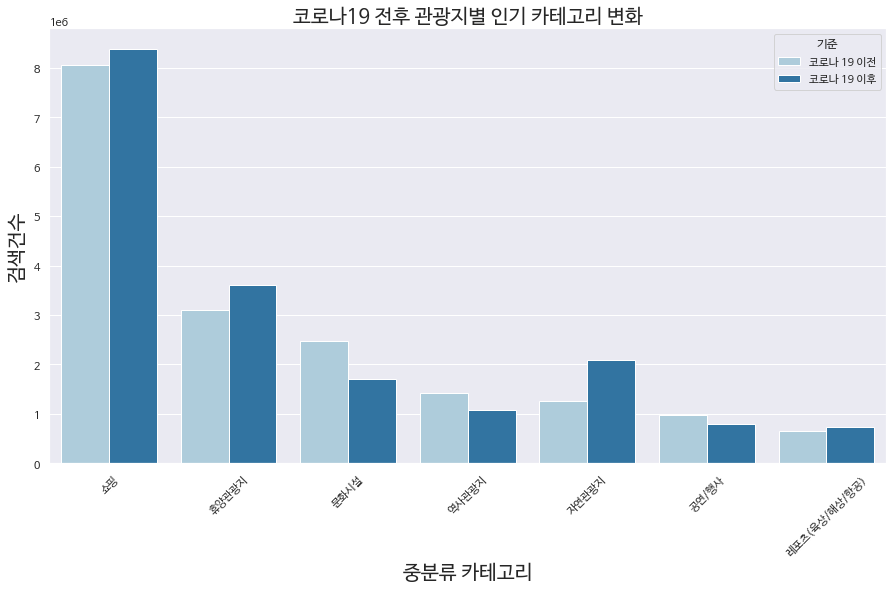

In [ ]:
# barplot 비교그래프
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15, 8)) 
plt.title("코로나19 전후 관광지별 인기 카테고리 변화", fontsize=20)
plt.xlabel("중분류 카테고리", fontsize=20)
plt.ylabel("검색건수", fontsize=20)
plt.xticks(rotation=45)
sns.barplot(data=pop_c,
            x = "중분류 카테고리",
            y = "검색건수",
            hue = "기준")

In [ ]:
!pip install folium

In [ ]:
import folium

map = folium.Map()
map

In [ ]:
import numpy as np
map = folium.Map(location=[36, 127], zoom_start=7)

for n in bc_c.index:
# 1. 좌표
  bctop10 = [ bc_c['위도'][n], bc_c['경도'][n] ]
# 2. 검색건수 가져오기
  radius = bc_c["검색건수"][n]/95000
  #radius = np.log(radius) * 2

  popac_str = f"{bc_c['관광지명'][n]} / {bc_c['검색건수'][n]}"

  folium.CircleMarker(
      bctop10, radius=radius, popup=popac_str,
      fill=True, fill_color='blue',
      opacity=0, fill_opacity=0.5
  ).add_to(map)

map

In [ ]:
import numpy as np
map = folium.Map(location=[36, 127], zoom_start=7)

for n in ac_c.index:
# 1. 좌표
  actop10 = [ ac_c['위도'][n], ac_c['경도'][n] ]
# 2. 검색건수 가져오기
  radius = ac_c["검색건수"][n] / 95000
  #radius = np.log(radius) * 2

  popac_str = f"{ac_c['관광지명'][n]} / {ac_c['검색건수'][n]}"

  folium.CircleMarker(
      actop10, radius=radius, popup=popac_str,
      fill=True, fill_color='blue',
      opacity=0, fill_opacity=0.5
  ).add_to(map)

map

In [ ]:
map = folium.Map(location=[36, 127], zoom_start=7)

for n in bc_cpop.index:
# 1. 좌표
  bcpoptop10 = [ bc_cpop['위도'][n], bc_cpop['경도'][n] ]
# 2. 검색건수 가져오기
  radius = bc_cpop["검색건수"][n] / 95000
  #radius = np.log(radius) / np.log(1.7)

  popac_str = f"{bc_cpop['관광지명'][n]} / {bc_cpop['검색건수'][n]}"

  folium.CircleMarker(
      bcpoptop10, radius=radius, popup=popac_str,
      fill=True, fill_color='blue',
      opacity=0, fill_opacity=0.5
      
      
  ).add_to(map)

map

In [ ]:
import numpy as np
map = folium.Map(location=[36, 127], zoom_start=7)

for n in ac_cpop.index:
# 1. 좌표
  acpoptop10 = [ ac_cpop['위도'][n], ac_cpop['경도'][n] ]
# 2. 검색건수 가져오기
  radius = ac_cpop["검색건수"][n] / 95000
  # radius = np.log(radius) * 2

  popac_str = f"{ac_cpop['관광지명'][n]} / {ac_cpop['검색건수'][n]}"

  folium.CircleMarker(
      acpoptop10, radius=radius, popup=popac_str,
      fill=True, fill_color='blue',
      opacity=0, fill_opacity=0.5
  ).add_to(map)

map

In [ ]:
# 코로나19 이전 각 관광지별 인기 카테고리 지역
bc_c2 = pd.DataFrame(bc.groupby(['중분류 카테고리'])['검색건수'].sum())
bc_c2 = bc_c2.reset_index()
bc_c2 = bc_c2.sort_values(by=['검색건수', '중분류 카테고리'],ascending=[False, True])
bc_c2 = bc_c2.drop_duplicates('중분류 카테고리')
bc_c2

,중분류 카테고리,검색건수
3,쇼핑,354233571.0
5,자연관광지,116506351.0
1,레포츠(육상/해상/항공),69636539.0
2,문화시설,35867918.0
4,역사관광지,34842176.0
6,휴양관광지,31342708.0
0,공연/행사,30477967.0


In [ ]:
# 코로나19 이후 각 관광지별 인기 카테고리 지역
ac_c2 = pd.DataFrame(ac.groupby(['중분류 카테고리'])['검색건수'].sum())
ac_c2 = ac_c2.reset_index()
ac_c2 = ac_c2.sort_values(by=['검색건수', '중분류 카테고리'],ascending=[False, True])
ac_c2 = ac_c2.drop_duplicates('중분류 카테고리')
ac_c2

,중분류 카테고리,검색건수
3,쇼핑,416265314.0
5,자연관광지,149891910.0
1,레포츠(육상/해상/항공),90530647.0
4,역사관광지,37865971.0
2,문화시설,26555970.0
6,휴양관광지,25510485.0
0,공연/행사,13299023.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


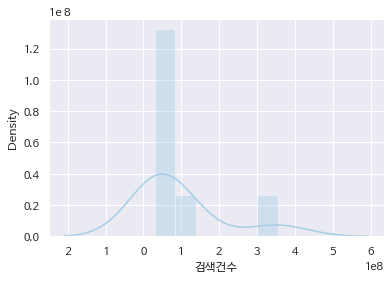

In [ ]:
sns.distplot(bc_c2["검색건수"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


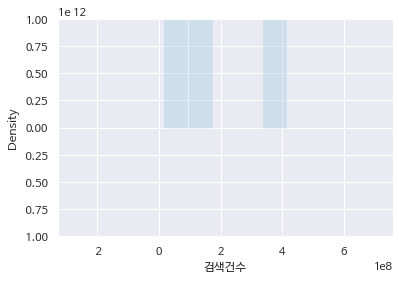

In [ ]:
sns.distplot(ac_c2["검색건수"])
plt.show()